In [29]:
import pandas as pd
import numpy as np

In [30]:
from pycaret.regression import *
import mlflow

In [31]:
#que pasaria si esta dentro del servidor colocar la ruta del servidor si esta con una api progrmamos con una api
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

In [32]:
exclude_variables=['Posted On','Area Locality','Floor']

In [33]:
data=pd.read_csv('raw.csv')

In [34]:
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [38]:
s=setup(data, target='Rent',
        ignore_features=exclude_variables,
        session_id=123,
        log_experiment=True,
        experiment_name='rent')

,Description,Value
0,Session id,123
1,Target,Rent
2,Target type,Regression
3,Original data shape,"(4746, 12)"
4,Transformed data shape,"(4746, 20)"
5,Transformed train set shape,"(3322, 20)"
6,Transformed test set shape,"(1424, 20)"
7,Ignore features,3
8,Numeric features,3
9,Categorical features,5


2024/10/15 19:54:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Session Initialized e121 at: http://127.0.0.1:5000/#/experiments/705688815352764605/runs/4c8300793c4843b7940363ac5921711d.
2024/10/15 19:54:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/705688815352764605.


In [8]:
best=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,14312.8777,5045659078.1693,54530.4814,0.4826,0.4474,0.3874,0.4870
ridge,Ridge Regression,23739.6404,5296318897.1466,56788.4579,0.4514,0.9342,1.2140,0.0130
llar,Lasso Least Angle Regression,23751.5103,5296610982.9683,56792.8031,0.4513,0.9328,1.2151,0.0140
lasso,Lasso Regression,23751.4121,5296606144.9223,56792.7289,0.4513,0.9329,1.2151,0.0180
lr,Linear Regression,23754.7578,5296784724.3862,56795.0008,0.4512,0.9324,1.2155,0.4700
lar,Least Angle Regression,23754.7578,5296784724.3862,56795.0008,0.4512,0.9324,1.2155,0.0140
br,Bayesian Ridge,24760.3761,5503810478.8511,58946.7464,0.4007,0.9512,1.2055,0.0130
en,Elastic Net,23588.8991,5550494455.1218,59565.6250,0.3815,0.9077,1.0591,0.0130
huber,Huber Regressor,16654.1362,5866915509.3811,61747.3304,0.3355,0.7612,0.4759,0.0190
gbr,Gradient Boosting Regressor,14515.2039,5599993788.4210,59799.9399,0.3182,0.4503,0.3942,0.0340


In [39]:
model=create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,16104.5849,3158631224.8742,56201.7013,0.5565,0.4541,0.4257
1,21815.6696,35293235604.3151,187864.9398,0.0920,0.4736,0.3742
2,10789.0424,804390369.4408,28361.7766,0.6026,0.3916,0.3418
3,16657.3950,4800055532.7338,69282.4331,-0.7729,0.4489,0.4142
4,14514.4791,1754008783.7157,41880.8880,0.5098,0.4478,0.4277
5,14701.2699,1466495758.0170,38294.8529,0.6856,0.4531,0.4008
6,13493.6271,2909113629.6224,53936.1996,-0.0096,0.4426,0.3929
7,11817.9701,1219896505.5427,34927.0168,0.3915,0.4047,0.3476
8,13324.2801,3496127021.3797,59128.0561,0.0193,0.4659,0.3830


2024/10/15 19:54:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/15 19:54:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random Forest Regressor at: http://127.0.0.1:5000/#/experiments/459878205301148418/runs/19321815229a4a788b0e0acd10aa1fc6.
2024/10/15 19:54:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/459878205301148418.


In [41]:
best_tuned=tune_model(model,n_iter=10, optimize='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15645.8134,3300203377.4494,57447.3966,0.5366,0.4397,0.4082
1,22604.8656,35852598752.6315,189347.8248,0.0776,0.5043,0.4308
2,10333.7246,734897674.8516,27108.9962,0.6370,0.3772,0.3507
3,13403.8612,1116529740.1973,33414.5139,0.5876,0.4320,0.4045
4,12043.9083,978570005.8690,31282.1036,0.7265,0.4157,0.3842
5,13444.1698,944168901.6623,30727.3315,0.7976,0.4332,0.3997
6,12001.5239,1072980507.1695,32756.3812,0.6276,0.4328,0.4115
7,10395.0292,659271380.3689,25676.2805,0.6711,0.3862,0.3650
8,12882.1403,1897426940.4798,43559.4644,0.4678,0.4646,0.3742


Fitting 10 folds for each of 10 candidates, totalling 100 fits


2024/10/15 19:56:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/15 19:56:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random Forest Regressor at: http://127.0.0.1:5000/#/experiments/459878205301148418/runs/31cf7e2fa1df4458806f949f5fdbd8f4.
2024/10/15 19:56:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/459878205301148418.


In [ ]:
evaluate_model(best_tuned)

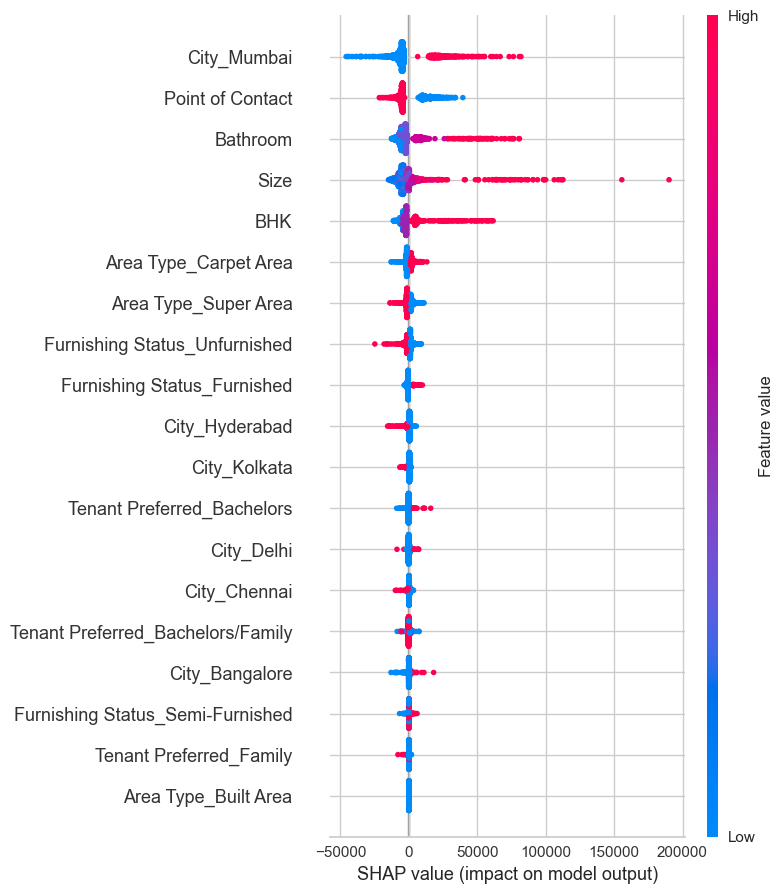

In [10]:
interpret_model(best_tuned)

In [44]:
final=finalize_model(best_tuned)

2024/10/15 20:02:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/15 20:02:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random Forest Regressor at: http://127.0.0.1:5000/#/experiments/459878205301148418/runs/2fb6b3c3da43486089070b5e53f9b2da.
2024/10/15 20:02:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/459878205301148418.


In [22]:
final

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['BHK', 'Size', 'Bathroom'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Area Type', 'City',
                                             'Furnishing Status',
                                             'Tenant Preferred',
                                             'Point of Contact'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 Tra...
                                                                    'Status',
                                                                    'Tenant '
                                                                    'Preferred'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator',
                 RandomForestRegressor(bootstrap=False, max_depth=10,
                                       max_features='sqrt',
                                       min_impurity_decrease=0.2,
                                       min_samples_leaf=5, min_samples_split=9,
                                       n_estimators=170, n_jobs=-1,
                                       random_state=123))])

In [24]:
predt_holdout= predict_model(best_tuned)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,13177.6211,1042703218.9755,32290.9154,0.7151,0.4476,0.4387
